In [2]:
import plotly.express as px #导入Plotly.express工具，命名为px

data = dict( #准备漏斗数据
    number=[59, 32, 18, 9, 2],
    stage=["访问数", "下载数", "注册数", "搜索数", "付款数"])
fig = px.funnel(data, x='number', y='stage') #把数据传进漏斗图
fig.show(); #显示漏斗图

In [4]:
import pandas as pd

stages = ["访问数", "下载数", "注册数", "搜索数", "付款数"]
df_male = pd.DataFrame(dict(number = [30, 15, 10, 6, 1], stage = stages))
df_male['性别'] = '男'
df_female = pd.DataFrame(dict(number = [29, 17, 8, 3, 1], stage = stages))
df_female['性别'] = '女'
df = pd.concat([df_male, df_female], axis = 0)
fig = px.funnel(df, x='number', y='stage', color='性别')
fig.show()

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")
df = pd.read_csv("fortune500.csv")

In [13]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [14]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [24]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
df.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [16]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [17]:
len(df)

25500

找出 DataFrame df 中列名为 "profit" 的数据中非数字的值，并返回这些非数字的行

In [18]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [25]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [26]:
len(df.profit[non_numberic_profits])

369

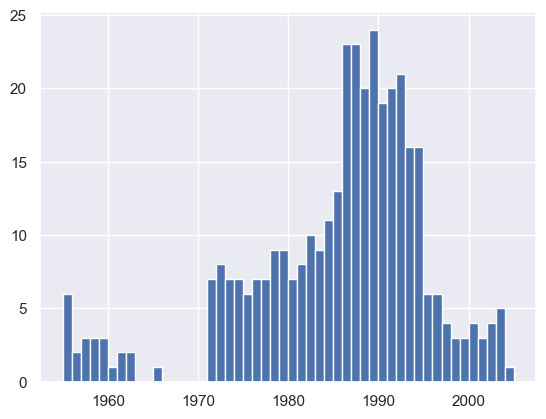

In [27]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [31]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

/var/folders/pj/g0wg2dkn2_ggrpb2f8sjnr4r0000gn/T/ipykernel_38202/3797335716.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
len(df)

25131

In [33]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [34]:
data = [['Alice', 25], ['Bob', 30], ['Charlie', 35]]
df = pd.DataFrame(data, columns=['Name', 'Age'])
df.head()

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [35]:
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}
df = pd.DataFrame(data)
df.head()

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [41]:
# 访问列数据
name_column = df['Name']
age_column = df.Age

# 访问行数据
first_row = df.loc[0]
second_row = df.iloc[1]

# 添加新列
df['Gender'] = ['Female', 'Male', 'Male']

# 过滤行
filtered_df = df[df['Age'] > 30]

# 修改数据
df.loc[0, 'Age'] = 26

# 删除列
df.drop('Gender', axis=1, inplace=True)


In [39]:
# 统计描述
df.describe()

# 求和
total_age = df['Age'].sum()

# 计算平均值
average_age = df['Age'].mean()

# 计数
count = df['Age'].count()
